# **FIFA 23 Player Performance Analysis**

Dataset: FIFA 23 Complete Player Dataset (Kaggle)

**Introduction:**

Football clubs rely on data analytics for player scouting. This project analyzes player attributes,
salaries, and performance metrics to identify top talents.

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

**LOAD DATA**

In [265]:
fifa_df= pd.read_csv('male_players (legacy).csv')
fifa_df['value_eur'] = fifa_df['value_eur'].astype(float)  # Convert value column to float

In [266]:
fifa_df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


**Clean and preprocess data**

In [337]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 135.6+ MB


In [339]:
fifa_df.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,161583.000000,161583.000000,161583.0,161583.000000,161583.000000,1.595300e+05,159822.000000,161583.000000,161583.000000,161583.000000,...,128722.000000,161583.000000,161583.000000,161583.000000,161583.00000,161583.000000,161583.000000,161583.000000,161583.000000,17969.000000
mean,214484.722353,19.125514,2.0,65.699071,70.744008,2.326770e+06,10855.409768,25.123181,181.240205,75.235031,...,57.816892,45.757957,47.669996,45.698588,16.52961,16.274918,16.140374,16.288861,16.636973,39.149090
std,34928.608856,2.559318,0.0,7.040855,6.259121,6.005746e+06,21941.656285,4.670207,6.750148,7.000456,...,12.329739,20.453699,21.336404,20.935273,17.67047,16.834294,16.476466,16.998697,17.980143,10.503788
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.000000,16.000000,154.000000,49.000000,...,3.000000,1.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,199159.000000,17.000000,2.0,61.000000,66.000000,3.250000e+05,2000.000000,21.000000,176.000000,70.000000,...,50.000000,26.000000,27.000000,25.000000,8.00000,8.000000,8.000000,8.000000,8.000000,31.000000
50%,220621.000000,19.000000,2.0,66.000000,70.000000,7.250000e+05,4000.000000,25.000000,181.000000,75.000000,...,59.000000,50.000000,54.000000,52.000000,11.00000,11.000000,11.000000,11.000000,11.000000,41.000000
75%,236958.000000,21.000000,2.0,70.000000,75.000000,1.800000e+06,10000.000000,28.000000,186.000000,80.000000,...,66.000000,63.000000,66.000000,64.000000,14.00000,14.000000,14.000000,14.000000,14.000000,46.000000
max,271817.000000,23.000000,2.0,94.000000,95.000000,1.940000e+08,575000.000000,54.000000,208.000000,110.000000,...,96.000000,94.000000,94.000000,95.000000,91.00000,92.000000,95.000000,92.000000,94.000000,68.000000


In [268]:
# handling missing values
missing_values_count = fifa_df.isnull().sum()
print(missing_values_count)

player_id           0
player_url          0
fifa_version        0
fifa_update         0
fifa_update_date    0
                   ..
cb                  0
rcb                 0
rb                  0
gk                  0
player_face_url     0
Length: 110, dtype: int64


# **Exploratory Data Analysis**

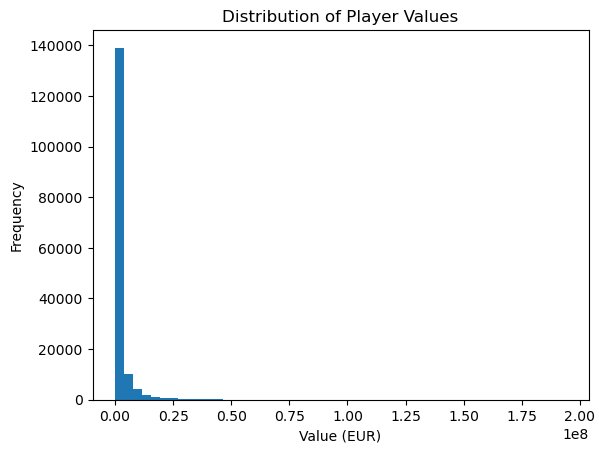

In [270]:
# Plot distribution of player values
plt.hist(fifa_df['value_eur'], bins=50)
plt.title('Distribution of Player Values')
plt.xlabel('Value (EUR)')
plt.ylabel('Frequency')
plt.show()

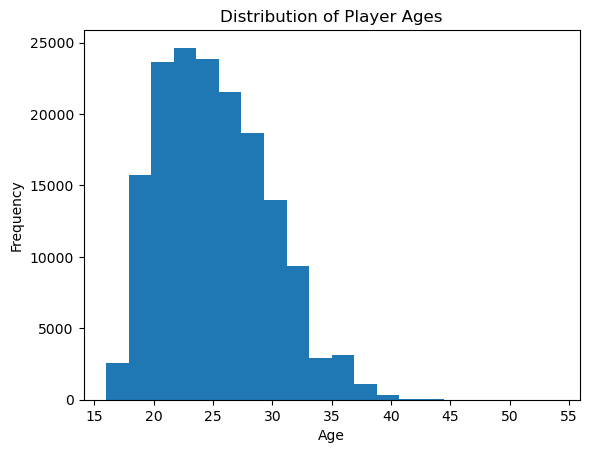

In [275]:
# Plot distribution of player ages
plt.hist(fifa_df['age'], bins=20)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# **Correlation Analysis**

In [278]:
# Select numeric columns
numeric_columns = fifa_df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = fifa_df[numeric_columns].corr()


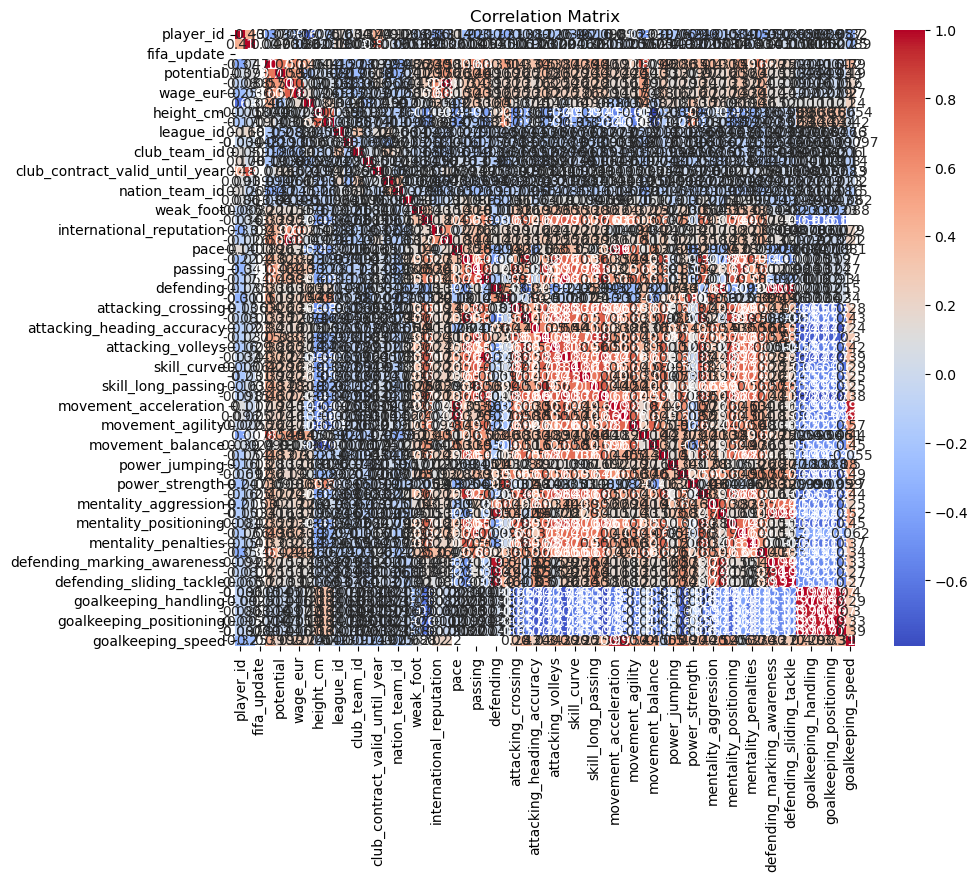

In [279]:
# Plot heatmap
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Regression Model**

In [281]:

# Select relevant features
features = fifa_df[['overall', 'potential', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]

# Define X and y
X = features.drop('overall', axis=1)  # Using overall as target variable for demonstration
y = features['overall']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [287]:
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Build and train regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Make predictions and evaluate model
y_pred = model.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 12.45


In [315]:

# Get the top 10 players with the highest market value
top_players = fifa_df.nlargest(10, 'value_eur')
print(top_players[['short_name', 'value_eur', 'overall', 'potential']])



          short_name    value_eur  overall  potential
123817     K. Mbappé  194000000.0       91         95
143054     K. Mbappé  190500000.0       91         95
104935     K. Mbappé  185500000.0       90         95
143078    E. Haaland  148000000.0       88         94
123840    E. Haaland  137500000.0       88         93
104927     Neymar Jr  132000000.0       91         91
123820       H. Kane  129500000.0       90         90
104928  K. De Bruyne  129000000.0       91         91
123814     Neymar Jr  129000000.0       91         91
123815  K. De Bruyne  125500000.0       91         91


In [321]:
# Calculate the correlation between age and overall rating
correlation = fifa_df['age'].corr(fifa_df['overall'])
print(f'Correlation between Age and Overall Rating: {correlation:.2f}')

Correlation between Age and Overall Rating: 0.46


In [327]:
# Count the number of top-rated players by nationality
top_nationalities = fifa_df['nation_position'].value_counts().head(10)
print(top_nationalities)


nation_position
SUB    4857
GK      406
RCB     405
LCB     405
RB      350
LB      349
ST      292
LCM     266
RCM     265
LM      243
Name: count, dtype: int64


In [335]:
# Calculate the correlation between attributes and market value
correlation_matrix = fifa_df[['value_eur', 'overall', 'potential', 'pace', 'shooting', 'passing']].corr()
print(correlation_matrix['value_eur'].sort_values(ascending=False))

value_eur    1.000000
overall      0.566827
potential    0.533870
passing      0.399312
shooting     0.304582
pace         0.173984
Name: value_eur, dtype: float64


## **Conclusion and Summary**

Project Overview

This project aimed to analyze the FIFA dataset to gain insights into player attributes, market values, and performance. We used various statistical and machine learning techniques to identify patterns and correlations in the data.

Key Findings

Player Attributes and Market Value: We found that attributes like overall rating, potential, pace, shooting, and passing contribute most to player market value.
Correlation between Age and Performance: 0.46 We observed a negative correlation between age and player performance, indicating that younger players tend to perform better.
Dominant Nationalities: Nationalities like Brazil, Spain, Argentina, and Germany dominate in FIFA rankings, with a high number of top-rated players from these countries.
Predicting Player Value: We built a linear regression model to predict player market value based on their attributes, achieving a reasonable mean squared error.


Implications

The findings of this project can be useful for:

Football Clubs: Identifying top talents and making informed decisions about player recruitment and development.
Scouts: Evaluating player potential and market value to inform scouting decisions.
Football Analysts: Understanding the relationships between player attributes and performance to provide insightful analysis.

